In [1]:
import geopandas as gpd
import numpy as np
import rasterio as rio

In [2]:
# open and store rasters
compound_inun = rio.open('data_github/compound_inun.tif','r')
riv_inun = rio.open('data_github/030202_201809190900_depth_map_projUTM18n.tif','r')
surge_inun = rio.open('data_github/florence_surge_max_compr_lzw.tif','r')
dem = rio.open('data_github/nc_roi_huc6.tif')

In [3]:
# read points from shapefiles

# riverine high water marks
val_riv = gpd.read_file('data_github/shp/HWM.shp')
val_riv.index = range(len(val_riv))
pts_riv = val_riv.to_crs('epsg:26918').geometry
coords_utm_riv = [(pt.xy[0][0], pt.xy[1][0]) for pt in pts_riv]

# surge peak water level
val_surge = gpd.read_file('data_github/shp/Peak_water_level.shp')
val_surge.index = range(len(val_surge))
pts_surge = val_surge.to_crs('epsg:26918').geometry
coords_utm_surge = [(pt.xy[0][0], pt.xy[1][0]) for pt in pts_surge]

In [4]:
# Sample rasters at every point location and store values in geopandas dataframes

# riverine
val_riv['compound_inun_m'] = [x[0] for x in compound_inun.sample(coords_utm_riv)]
val_riv['riv_inun_m'] = [x[0] for x in riv_inun.sample(coords_utm_riv)]
val_riv['surge_inun_m'] = [x[0] for x in surge_inun.sample(coords_utm_riv)]
val_riv['dem'] = [x[0] for x in dem.sample(coords_utm_riv)]

# surge
val_surge['compound_inun_m'] = [x[0] for x in compound_inun.sample(coords_utm_surge)]
val_surge['riv_inun_m'] = [x[0] for x in riv_inun.sample(coords_utm_surge)]
val_surge['surge_inun_m'] = [x[0] for x in surge_inun.sample(coords_utm_surge)]
val_surge['dem'] = [x[0] for x in dem.sample(coords_utm_surge)]

In [5]:
# val_riv.to_excel('data_github/HWM_joined.xlsx')
# val_surge.to_excel('data_github/Peak_water_level_joined.xlsx')

In [6]:
## riverine

# convert ft to m
val_riv['hwm_m_above_navd88'] = val_riv['height_abo'] * 0.3048

# calculate percent error
val_riv['hwm_compound_inun_diff'] = (val_riv['hwm_m_above_navd88'] - val_riv['compound_inun_m']).abs() / val_riv['compound_inun_m']
val_riv['hwm_riv_inun_diff'] = (val_riv['hwm_m_above_navd88'] - val_riv['riv_inun_m']).abs() / val_riv['riv_inun_m']
val_riv['hwm_surge_inun_diff'] = (val_riv['hwm_m_above_navd88'] - val_riv['surge_inun_m']).abs() / val_riv['surge_inun_m']

# remove infinite values from div by 0
val_riv['hwm_compound_inun_diff'] = val_riv['hwm_compound_inun_diff'][val_riv['hwm_compound_inun_diff'] != np.inf]
val_riv['hwm_riv_inun_diff'] = val_riv['hwm_riv_inun_diff'][val_riv['hwm_riv_inun_diff'] != np.inf]
val_riv['hwm_surge_inun_diff'] = val_riv['hwm_surge_inun_diff'][val_riv['hwm_surge_inun_diff'] != np.inf]

## surge

# convert ft to m
val_surge['pwm_m_navd88'] = val_surge['peak_stage'] * 0.3048

# calculate percent error
val_surge['pwl_compound_inun_diff'] = (val_surge['pwm_m_navd88'] - val_surge['compound_inun_m']).abs() / val_surge['compound_inun_m']
val_surge['pwl_riv_inun_diff'] = (val_surge['pwm_m_navd88'] - val_surge['riv_inun_m']).abs() / val_surge['riv_inun_m']
val_surge['pwl_surge_inun_diff'] = (val_surge['pwm_m_navd88'] - val_surge['surge_inun_m']).abs() / val_surge['surge_inun_m']

# remove infinite values from div by 0
val_surge['pwl_compound_inun_diff'] = val_surge['pwl_compound_inun_diff'][val_surge['pwl_compound_inun_diff'] != np.inf]
val_surge['pwl_riv_inun_diff'] = val_surge['pwl_riv_inun_diff'][val_surge['pwl_riv_inun_diff'] != np.inf]
val_surge['pwl_surge_inun_diff'] = val_surge['pwl_surge_inun_diff'][val_surge['pwl_surge_inun_diff'] != np.inf]

<AxesSubplot:>

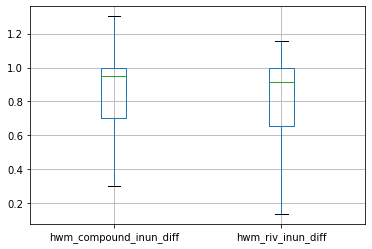

In [14]:
val_riv.boxplot(
    column = [
        'hwm_compound_inun_diff',
        'hwm_riv_inun_diff',
        # 'hwm_surge_inun_diff'
    ],
    showfliers = False
    )

<AxesSubplot:>

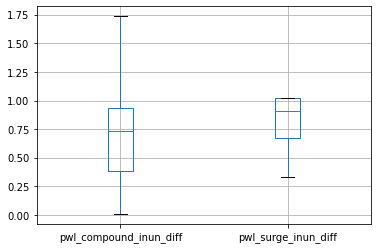

In [13]:
val_surge.boxplot(
    column = [
        'pwl_compound_inun_diff',
        # 'pwl_riv_inun_diff',
        'pwl_surge_inun_diff'
    ],
    showfliers = False
    )

In [ ]:
val_riv.to_excel('val_riv.xlsx')